In [19]:
import math

import random

from collections import *

import time

import matplotlib.pyplot as plt

%matplotlib inline

In [20]:
def load_data(path):
    with open(path) as f:
        lines = f.readlines()
    
    data_x = []
    data_y = []
    
    for line in lines:
        line = list(map(str.strip, line.split(',')))    
        
        data_x.append(line[:5])
        data_y.append(line[5])
        
    return data_x, data_y

In [21]:
train_x, train_y = load_data('dataset/train.csv')
validate_x, validate_y = load_data('dataset/validate.csv')
test_x, test_y = load_data('dataset/train.csv')

len(train_x), len(train_y)

(107, 107)

In [22]:
# Encode features

unique_country = {}
unique_season = {}
unique_windspeed = {}
unique_location = {}
unique_weather = {}

unique_temperature = {}


for country, season, windspeed, location, weather in train_x:
    if country not in unique_country:
        unique_country[country] = len(unique_country)
    
    if season not in unique_season:
        unique_season[season] = len(unique_season)
    
    if windspeed not in unique_windspeed:
        unique_windspeed[windspeed] = len(unique_windspeed)
    
    if location not in unique_location:
        unique_location[location] = len(unique_location)
    
    if weather not in unique_weather:
        unique_weather[weather] = len(unique_weather)    
            

for temp in train_y:
    if temp not in unique_temperature:
        unique_temperature[temp] = len(unique_temperature)
    
    
unique_country, unique_season, unique_windspeed, unique_location, unique_weather,  unique_temperature

({'Africa': 0, 'Australia': 1, 'North America': 2},
 {'Spring': 0, 'Summer': 1, 'Autumn': 2, 'Winter': 3},
 {'High': 0, 'Low': 1, 'Normal': 2},
 {'Coast Line': 0, 'Coastline': 1, 'Inland': 2},
 {'Rainy': 0, 'Sunny': 1, 'Cloudy': 2, 'Humid': 3},
 {'Normal': 0, 'Hot': 1, 'Cold': 2})

In [23]:
def featureize(input_x, input_y):
    # one hot encode for features
    
    country = [0] * len(unique_country)    
    season = [0] * len(unique_season)
    windspeed = [0] * len(unique_windspeed)
    location = [0] * len(unique_location)
    weather = [0] * len(unique_weather)
    
    c_idx = unique_country[input_x[0]]
    s_idx = unique_season[input_x[1]]
    w_idx = unique_windspeed[input_x[2]]
    l_idx = unique_location[input_x[3]] 
    weather_idx = unique_weather[input_x[4]] 
    
    country[c_idx] = 1
    season[s_idx] = 1
    windspeed[w_idx] = 1 
    location[l_idx] = 1
    weather[weather_idx] = 1
    
    feature_x = country + season + windspeed + location + weather    
    label_y = unique_temperature[input_y]    

    
    return feature_x, label_y

In [24]:
x_train_set = []
y_train_set = []

for x, y in zip(train_x, train_y):
    x, y = featureize(x, y)
    x_train_set.append(x)
    y_train_set.append(y)


In [25]:
x_validation_set = []
y_validation_set = []

for x, y in zip(validate_x, validate_y):
    x, y = featureize(x, y)
    x_validation_set.append(x)
    y_validation_set.append(y)

In [26]:
category_freq = Counter(y_train_set)
category_freq

Counter({0: 47, 2: 34, 1: 26})

In [27]:
prior = defaultdict(float)

for category in category_freq:
    prior[category] = category_freq[category] / len(train_x)
    

In [28]:
prior

defaultdict(float,
            {0: 0.4392523364485981,
             1: 0.24299065420560748,
             2: 0.3177570093457944})

In [29]:
# calculate mean and variance for each feature

n_features = len(x_train_set[0])

mean = defaultdict(lambda : [0] * n_features)

for sample, label in zip(x_train_set, y_train_set):
    for idx, feature in enumerate(sample):
        mean[label][idx] += feature
        
for value in mean.values():
    for idx in range(len(value)):
        value[idx] /= len(x_train_set)

mean

defaultdict(<function __main__.<lambda>()>,
            {0: [0.18691588785046728,
              0.009345794392523364,
              0.24299065420560748,
              0.11214953271028037,
              0.08411214953271028,
              0.17757009345794392,
              0.06542056074766354,
              0.17757009345794392,
              0.08411214953271028,
              0.17757009345794392,
              0.27102803738317754,
              0.009345794392523364,
              0.1588785046728972,
              0.09345794392523364,
              0.09345794392523364,
              0.14953271028037382,
              0.102803738317757],
             1: [0.12149532710280374,
              0.056074766355140186,
              0.06542056074766354,
              0.018691588785046728,
              0.1588785046728972,
              0.04672897196261682,
              0.018691588785046728,
              0.12149532710280374,
              0.028037383177570093,
              0.09345794392523364,
  

In [30]:
# varience

varience = defaultdict(lambda : [0] * n_features)

for sample, label in zip(x_train_set, y_train_set):
    for idx, feature in enumerate(sample):
        varience[label][idx] += (feature - mean[label][idx]) ** 2

        
for value in varience.values():
    for idx in range(len(value)):
        value[idx] /= len(x_train_set)  

varience

defaultdict(<function __main__.<lambda>()>,
            {0: [0.13238718967415838,
              0.009209472647082585,
              0.15083715428764552,
              0.09251920136680916,
              0.07307008815200773,
              0.12835794335382522,
              0.05874079522106567,
              0.12835794335382522,
              0.07307008815200773,
              0.12835794335382522,
              0.15638144946748814,
              0.009209472647082585,
              0.11948152024051406,
              0.07982576938115633,
              0.07982576938115638,
              0.1146343434475361,
              0.08630880711942353],
             1: [0.0955599109582276,
              0.05055006232434291,
              0.057900824705745,
              0.018077732781624816,
              0.11452740842566339,
              0.04289237194122983,
              0.018077732781624813,
              0.09555991095822758,
              0.02665620716987077,
              0.0781115438396856,
     

In [31]:
def gausian_probability(xs, mean, var, smoothing):
    probability = []
        
    for idx, x in enumerate(xs):
        m = mean[idx]
        v = var[idx] + smoothing
        
        prob = 1 / math.sqrt(2 * math.pi * v) * math.exp(-(x - m) ** 2 / (2 * v))
        
        probability.append(math.log(prob))
    
    return sum(probability)


def argmax(values):
    max_value = float('-inf')
    max_index = 0

    for idx, value in enumerate(values):
        if value > max_value:
            max_index = idx
            max_value = value

    return max_index

In [32]:
def predict_naive_bayes(sample, smoothing):    
    gaussians_likelihood = [0] * 3
    
    for cls in range(3):
        m = mean[cls]
        var = varience[cls]
        
        probability = gausian_probability(sample, m, var, smoothing)               
        
        probability += math.log(prior[cls])
        
        gaussians_likelihood[cls] = probability        
    
    return argmax(gaussians_likelihood)
        

In [33]:
def test(x_test, y_test, smoothing):    
    confussion_matrix = [[0] * 3 for _ in range(3)]
    net_accuracy = 0

    for i in range(len(x_test)):
        prediction = predict_naive_bayes(x_test[i], smoothing)

        confussion_matrix[prediction][y_test[i]] += 1        

        if prediction == y_test[i]:
            net_accuracy += 1

    return confussion_matrix, net_accuracy / len(x_test)

In [34]:
x_test_set = []
y_test_set = []

for x, y in zip(test_x, test_y):
    x, y = featureize(x, y)
    x_test_set.append(x)
    y_test_set.append(y)


In [35]:
# test

smoothings = [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100]

scores = []

for smoothing in smoothings:
    cm, acc = test(x_test_set, y_test_set, smoothing)
    
    scores.append((cm, acc))


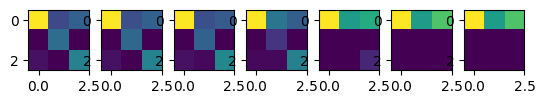

In [36]:
# draw confussion matrix

fig, axs = plt.subplots(nrows=1, ncols=len(smoothings))
    
for i, ax in enumerate(axs.flat):
    
    ax.set_label(smoothings[i])

    ax.imshow(scores[i][0])
    

In [37]:
# Accuracy
accuracy = []
for i in range(len(scores)):
    accuracy.append(scores[i][1])
    print(f'Smoothing: {smoothings[i]} \tAccuracy: {scores[i][1]}')

Smoothing: 0.001 	Accuracy: 0.7570093457943925
Smoothing: 0.01 	Accuracy: 0.7476635514018691
Smoothing: 0.1 	Accuracy: 0.7476635514018691
Smoothing: 0.5 	Accuracy: 0.6822429906542056
Smoothing: 1.0 	Accuracy: 0.48598130841121495
Smoothing: 10 	Accuracy: 0.4392523364485981
Smoothing: 100 	Accuracy: 0.4392523364485981


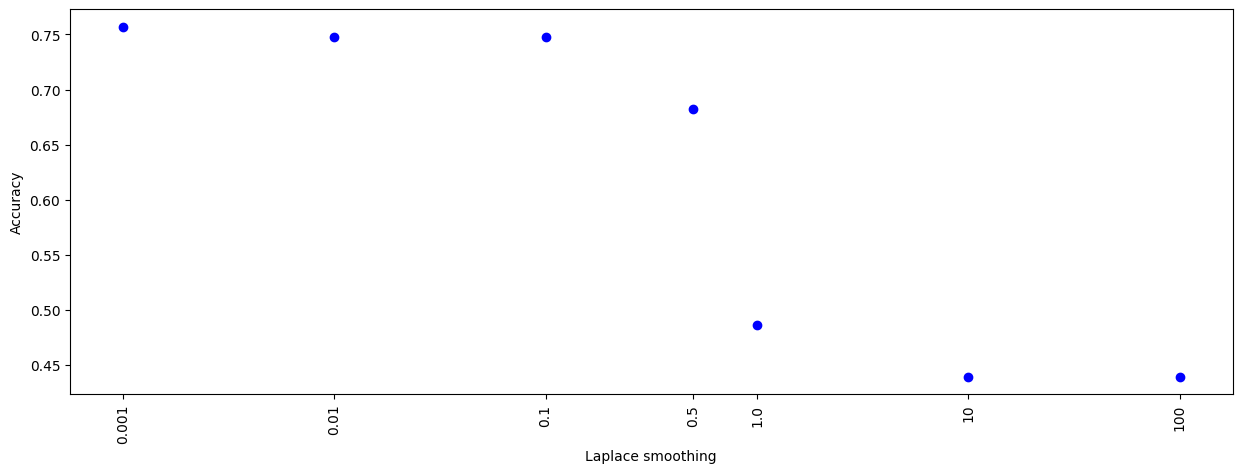

In [38]:
plt.rcParams["figure.figsize"] = (15,5)

plt.plot(list(map(math.log, smoothings)), accuracy, 'bo')
plt.xlabel('Laplace smoothing')
plt.ylabel('Accuracy')
plt.xticks(list(map(math.log, smoothings)), labels=smoothings, rotation=90)

plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]